# SGD Algorithm to predict movie ratings

<pre>
1. Download the data from <a href='https://drive.google.com/open?id=1-1z7iDB52cB6_JpO7Dqa-eOYSs-mivpq'> here </a>
2. the data will be of this formate, each data point is represented as a triplet of user_id, movie_id and rating 
<table>
<tr><th>user_id</th><th>movie_id</th><th>rating</th></tr>
<tr><td>77</td><td>236</td><td>3</td></tr>
<tr><td>471</td><td>208</td><td>5</td></tr>
<tr><td>641</td><td>401</td><td>4</td></tr>
<tr><td>31</td><td>298</td><td>4</td></tr>
<tr><td>58</td><td>504</td><td>5</td></tr>
<tr><td>235</td><td>727</td><td>5</td></tr>
</table>
<h3>task 1: Predict the rating for a given (user_id, movie_id) pair</h3>
</pre>
<ul>
<li><span class="math">\(\mu\)</span> : scalar mean rating</li>
<li><span class="math">\(b_i\)</span> : scalar bias term for user <span class="math">\(i\)</span></li>
<li><span class="math">\(c_j\)</span> : scalar bias term for movie <span class="math">\(j\)</span></li>
<li><span class="math">\(u_i\)</span> : K-dimensional vector for user <span class="math">\(i\)</span></li>
<li><span class="math">\(v_j\)</span> : K-dimensional vector for movie <span class="math">\(j\)</span></li>
</ul>
then the predicted rating $\hat{y}_{ij}$ for user i, movied j pair is calcuated as $\hat{y}_{ij} = \mu + b_i + c_j + u_i^T v_j$ here we will be finding the best values of $b_{i}$ and $c_{j}$ using SGD algorithm with the optimization problem for N users and M movies is defined as


$$
L = \min_{ b, c, \{ u_i \}_{i=1}^N, \{ v_j \}_{j=1}^M}
\quad
\alpha \Big(
    \sum_{j} \sum_{k} v_{jk}^2 
    + \sum_{i} \sum_{k} u_{ik}^2 
    + \sum_{i} b_i^2
    + \sum_{j} c_i^2
    \Big)
+ \sum_{i,j \in \mathcal{I}^{\text{train}}}
    (y_{ij} - \mu - b_i - c_j - u_i^T v_j)^2
$$

### TASK: 1
__SGD Algorithm to minimize the loss__
1. for each unique user initilize a bias value $B_{i}$ randomly, so if we have $N$ users $B$ will be a $N$ dimensional vector, the $i^{th}$ value of the $B$ will corresponds to the bias term for $i^{th}$ user

2. for each unique movie initilize a bias value $C_{j}$ randomly, so if we have $M$ movies $C$ will be a $M$ dimensional vector, the $j^{th}$ value of the $C$ will corresponds to the bias term for $j^{th}$ movie

3. Construct adjacency matrix with the given data, assumeing its  <a href='https://en.wikipedia.org/wiki/Bipartite_graph'> weighted un-directed bi-partited graph</a> and the weight of each edge is the rating given by user to the movie
<img src='https://i.imgur.com/rmUCGMb.jpg' width=200>
you can construct this matrix like $A[i][j]=r_{ij}$ here $i$ is user_id, $j$ is movie_id and $r_{ij}$ is rating given by user $i$ to the movie $j$

4. we will Apply SVD decomposition on the Adjaceny matrix <a href='https://stackoverflow.com/a/31528944/4084039'>link1</a>, <a href='https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/'> link2</a> and get three matrices $U, \sum, V$ such that $U \times \sum \times V^T = A$, <br> 
if $A$ is of dimensions $N \times M$ then <br>
U is of $N \times k$, <br>
$\sum$ is of $k \times k$ and <br>
$V$ is $M \times k$ dimensions. <br>

5. So the matrix $U$ can be represented as matrix representation of users, where each row $u_{i}$ represents a k-dimensional vector for a user

6. So the matrix $V$ can be represented as matrix representation of movies, where each row $v_{j}$ represents a k-dimensional vector for a movie

7. $\mu$ represents the mean of all the rating given in the dataset
</pre>

<br>8.
<pre>
for each epoch:
    for each pair of (user, movie):
        b_i =  b_i - learning_rate * dL/db_i
        c_j =  c_j - learning_rate * dL/dc_j
    predict the ratings with formula</pre>$\hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j) $
 <pre>
    print the mean squared error with predicted ratings
    </pre>

9. you can choose any learning rate and regularization term in the range $10^{-3}  \text{ to } 10^2$  <br>

10. __bonus__: instead of using SVD decomposition you can learn the vectors $u_i$, $v_j$ with the help of SGD algo similar to $b_i$ and $c_j$ 
### TASK: 2

As we know U is the learned matrix of user vectors, with its i-th row as the vector ui for user i. Each row of U can be seen as a "feature vector" for a particular user.

The question we'd like to investigate is this: do our computed per-user features that are optimized for predicting movie ratings contain anything to do with gender?

The provided data file <a href='https://drive.google.com/open?id=1PHFdJh_4gIPiLH5Q4UErH8GK71hTrzlY'>user_info.csv</a> contains an is_male column indicating which users in the dataset are male. Can you predict this signal given the features U?


> __Note 1__ : there is no train test split in the data, the goal of this assignment is to give an intution about how to do matrix factorization with the help of SGD and application of truncated SVD. for better understanding of the collabarative fillerting please check netflix case study. <br><br>
> __Note 2__ : Check if scaling of $U$, $V$ matrices improve the metric 

In [1]:
import pandas as pd
data = pd.read_csv('ratings_train.csv')
data.shape

(89992, 3)

In [2]:
from sklearn.utils.extmath import randomized_svd
import numpy as np 
matrix = np.random.random((20, 10))
U, Sigma, VT = randomized_svd(matrix, n_components=5,n_iter=5, random_state=None)
print(U.shape)
print(Sigma.shape)
print(VT.T.shape)

(20, 5)
(5,)
(10, 5)


In [3]:
data.head()

user_id  item_id  rating
0      772       36       3
1      471      228       5
2      641      401       4
3      312       98       4
4       58      504       5

In [0]:
user_data=[]
item_data=[]
ratings=[]
for i in range(data.shape[0]):
    user=(data['user_id'].iloc[i])                #getting user id and appending to list list
    item=(data['item_id'].iloc[i])                #getting item value and appending to list
    rat=(data['rating'].iloc[i])                  #getting rating value and appending to list
    user_data.append(user)
    item_data.append(item)
    ratings.append(rat)

In [5]:
from scipy.sparse import csr_matrix

adj_matrix = csr_matrix((ratings, (user_data, item_data)))
adj_matrix.shape

(943, 1681)

In [6]:
from sklearn.utils.extmath import randomized_svd
import numpy as np 
# matrix = np.random.random((20, 10))
U, Sigma, VT = randomized_svd(adj_matrix, n_components=5,n_iter=5, random_state=None)
print(U.shape)
print(Sigma.shape)
print(VT.T.shape)

(943, 5)
(5,)
(1681, 5)


In [0]:
b = {i: 0 for i in range(adj_matrix.shape[0])}
c = {i: 0 for i in range(adj_matrix.shape[1])}

In [0]:
def b_grad(alpha, B, C, y, mu, i, j):
    grad_b = (alpha * 2 * B) - (2 * (y - mu - B - C - np.dot(U[i], VT.T[j])))
    
    return grad_b

In [0]:
def c_grad(alpha, B, C, y, mu, i, j):
    grad_c = (alpha * 2 * C) - (2 * (y - mu - B - C - np.dot(U[i], VT.T[j]))) 
    
    return grad_c

In [0]:
from sklearn.metrics import mean_squared_error
import numpy as np
def my_SGD(X, lr, alpha, u_mat, v_mat, epoch=30):
    mu = mu = np.mean(X.rating.values)
    errors = []
    our_b = b
    our_c = c
    
    for i in range(epoch):
        dic_b = our_b
        dic_c = our_c
        y_pred_ls = []
        new_b = []
        new_c = []
        for user, movie, rating in zip(X.user_id.values, X.item_id.values, X.rating.values):
            b_n = dic_b[user] - lr * b_grad(alpha, dic_b[user], dic_c[movie], rating, mu, user, movie)
            c_n = dic_c[movie] - lr * c_grad(alpha, dic_b[user], dic_c[movie], rating, mu, user, movie)
            
            new_b.append(b_n)
            new_c.append(c_n)
            
            y_pred = mu + b_n + c_n + np.dot(u_mat[user], v_mat.T[movie])
            y_pred_ls.append(y_pred)
        
        new_dic_b = {i: j for i, j in zip(X.user_id.values, new_b)}
        new_dic_c = {i: j for i, j in zip(X.item_id.values, new_c)}
        our_b = new_dic_b
        our_c = new_dic_c
        
        y_true = list(X.rating.values)
        error = mean_squared_error(y_true, y_pred_ls)
        errors.append(error)
        print('epoch: {0}, mse: {1} '.format(i+1, error))
        
    return errors

In [35]:
import matplotlib.pyplot as plt
loss = my_SGD(data, 0.1, 0.001, U, VT, epoch=30)
# Create count of the number of epochs
epoch_count = range(1, len(my_errors) + 1)

# Visualize loss history
plt.plot(epoch_count, loss, 'r--')
plt.plot(epoch_count, loss, 'b-')
plt.legend(['loss', 'epoch'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show();

epoch: 1, mse: 0.4553964697831134 
epoch: 2, mse: 0.42308421149916475 
epoch: 3, mse: 0.4437855527785993 
epoch: 4, mse: 0.4812908067615639 
epoch: 5, mse: 0.5229929287596353 
epoch: 6, mse: 0.5642581404230848 
epoch: 7, mse: 0.60326241712288 
epoch: 8, mse: 0.6392636393833755 
epoch: 9, mse: 0.6719956239924192 
epoch: 10, mse: 0.7014326229587288 
epoch: 11, mse: 0.727682164163232 
epoch: 12, mse: 0.7509274907371162 
epoch: 13, mse: 0.7713927201599393 
epoch: 14, mse: 0.7893204323247203 
epoch: 15, mse: 0.8049569768177463 
epoch: 16, mse: 0.8185429134290116 
epoch: 17, mse: 0.830306974937853 
epoch: 18, mse: 0.8404624779085237 
epoch: 19, mse: 0.8492054394669053 
epoch: 20, mse: 0.8567138765922584 
epoch: 21, mse: 0.8631479132340509 
epoch: 22, mse: 0.868650424536391 
epoch: 23, mse: 0.8733480218820487 
epoch: 24, mse: 0.8773522368534283 
epoch: 25, mse: 0.8807608025198717 
epoch: 26, mse: 0.8836589605423257 
epoch: 27, mse: 0.8861207450217744 
epoch: 28, mse: 0.8882102106437167 
epoch

# Task 2

In [12]:
data_male = pd.read_csv('user_info.csv.txt')
data_male.head()

user_id  age  is_male  orig_user_id
0        0   24        1             1
1        1   53        0             2
2        2   23        1             3
3        3   24        1             4
4        4   33        0             5

In [0]:
y_true = data_male.is_male.values

In [0]:
from sklearn.svm import SVC

clf = SVC(gamma='auto')
clf.fit(U, y_true)
y_pred = clf.predict(U)

In [15]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_true, y_pred)
print('accuracy: {0}'.format(acc))

accuracy: 0.7104984093319194


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


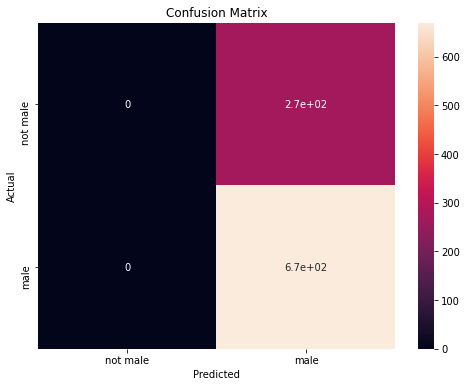

In [16]:

from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

c_matrix= confusion_matrix(y_true, y_pred)

df_cm = pd.DataFrame(c_matrix, index = [i for i in ['not male', 'male']], 
                     columns = [i for i in ['not male', 'male']])
plt.figure(figsize = (8,6))
sns.heatmap(df_cm, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Observations:

-> we can see that the accuracy is very low and and our model is not predicting any non male users